In [2]:
'''Make figures of reconstruction quality for attention task.'''

import os
import yaml

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


In [3]:
# Functions #####################################################

def weird_form_to_long(df, target_col, identify_cols=[]):
    df_result = pd.DataFrame()
    for i, row in df.iterrows():
        tmp = {}
        for col in identify_cols:
            tmp[col] = row[col]
        tmp[target_col] = row[target_col]
        df_result = pd.concat([df_result, pd.DataFrame(tmp)])
    return df_result

In [4]:
# Settings #######################################################
conf_file = "config/recon_vggsound_attention_fmriprep_rep4_500voxel_vggishish_allunits_fastl2lir_alpha100.yaml"
output_dir = '../data/figures'

with open(conf_file, 'r') as f:
    conf = yaml.safe_load(f)
quality_file = os.path.join(conf['eval feat output dir'], "quality.pkl.gz")
audiofeature_quality_file = os.path.join(conf['eval feat output dir'], "quality_audiofeature.pkl.gz")
eval_feats = ["mel", "conv1", "conv5", "mix5_d", "mix6_e", "mix7_c", "fc1", "f0", "sc", "hnr"]

subjects = conf['recon subjects']
rois = conf['recon rois']
layers = list(conf['recon layers'].keys())

print("Qaultiy filepath:", quality_file)
print("Audio feature qaultiy filepath:", audiofeature_quality_file)
print("Subjects: {}".format(subjects))
print("ROIs:     {}".format(rois))
print("Layers:   {}".format(layers))
print("Eval feats: {}".format(eval_feats))
quality_df = pd.read_pickle(quality_file)
aud_quality_df = pd.read_pickle(audiofeature_quality_file)
quality_df = pd.concat([quality_df, aud_quality_df])
display(quality_df)



Qaultiy filepath: ../data/recon_features/VGGishish/sound_attention/melception/quality.pkl.gz
Audio feature qaultiy filepath: ../data/recon_features/VGGishish/sound_attention/melception/quality_audiofeature.pkl.gz
Subjects: ['S1', 'S2', 'S3', 'S4', 'S5']
ROIs:     ['AC']
Layers:   ['conv5_3']
Eval feats: ['mel', 'conv1', 'conv5', 'mix5_d', 'mix6_e', 'mix7_c', 'fc1', 'f0', 'sc', 'hnr']


,layer,subject,roi,eval_feat,identification accuracy,pattern correlation for attend,pattern correlation for unattend,profile correlation for attend,profile correlation for unattend,distance for attend,distance for unattend
0,conv5_3,S1,AC,conv1,"[0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[0.18086952491477734, 0.18881699918104158, 0.1...","[0.3890625311384872, 0.11217930219110567, 0.07...","[0.11694446250331186, 0.009462641486656851, -0...","[0.1064679366604515, 0.09135222181769324, 0.21...",NaN,NaN
1,conv5_3,S1,AC,conv2,"[0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, ...","[0.08341337039247465, 0.07920547354892905, 0.0...","[0.1697664506289301, 0.035009024727499186, 0.0...","[-0.031460261573367454, -0.026747748137811632,...","[-0.03839140357519336, 0.23520119823859686, -0...",NaN,NaN
2,conv5_3,S1,AC,conv3,"[0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, ...","[0.05427664255460293, 0.05364670140574315, 0.0...","[0.10623094652038156, 0.032950280111399215, 0....","[0.03492850076928749, -0.07364066498378904, -0...","[0.08621918030912958, -0.05294376459052451, 0....",NaN,NaN
3,conv5_3,S1,AC,conv4,"[0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, ...","[0.03460740517048148, 0.032402544132880046, 0....","[0.0643312484248216, 0.030167554589223808, 0.0...","[0.044142406198892856, 0.1514581887911764, -0....","[-0.10602802454251053, -0.017394581497730165, ...",NaN,NaN
4,conv5_3,S1,AC,conv5,"[0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[0.022155496259895928, 0.024657446409109572, 0...","[0.05150662070189812, 0.019986934590792746, 0....","[0.11659738050716627, 0.004921918247193342, -0...","[-0.16224855061839433, 0.02159620518838521, -0...",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
10,conv5_3,S4,AC,hnr,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, ...",NaN,NaN,NaN,NaN,"[1.5296813805522773, 1.3952867322911797, 2.821...","[5.223232879668867, 5.194854433324824, 5.69096..."
11,conv5_3,S4,AC,sc,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, ...",NaN,NaN,NaN,NaN,"[131.35260908589726, 62.733320057129276, 80.86...","[504.60482219442315, 780.1134569035023, 588.94..."
12,conv5_3,S5,AC,f0,"[1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, ...",NaN,NaN,NaN,NaN,"[339.3665577445943, 68.4065574958145, 53.10564...","[363.69100236912715, 34.434090974790166, 24.89..."
13,conv5_3,S5,AC,hnr,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, ...",NaN,NaN,NaN,NaN,"[0.42356876989067693, 2.179588939209985, 1.886...","[3.2699827292259123, 5.97915664024363, 4.75563..."


In [5]:
# Prepare the data for plotting #################################
a_df = quality_df.query("layer == 'conv5_3' and roi == 'AC'")
ident_df = a_df[["subject", "eval_feat", "identification accuracy"]]
ident_df = weird_form_to_long(ident_df, "identification accuracy", ["subject", "eval_feat"])


Saved ../data/figures/Fig8C.png


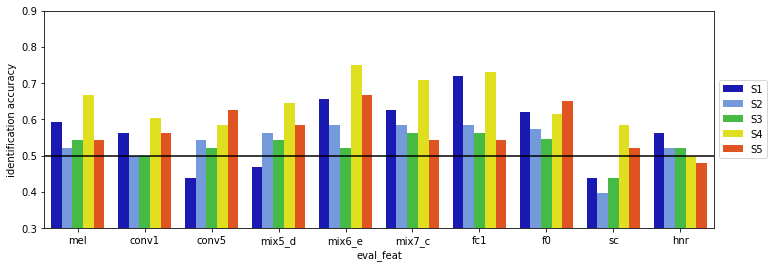

In [8]:
# Fig.3E Identification accuracy #################################
fig, ax = plt.subplots(1, 1, figsize=(12, 4))
sns.barplot(ax=ax, 
            data=ident_df, 
            x="eval_feat", order=eval_feats,
            y="identification accuracy",  
            hue="subject", 
            palette=["mediumblue", "cornflowerblue", "limegreen", "yellow", "orangered"],
            ci=None)
ax.set_ylim([0.3, 0.9])
ax.axhline(0.5, color='k', linestyle='-')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
save_filename = os.path.join(output_dir, 'Fig8C.png')
fig.savefig(save_filename, dpi=300, bbox_inches='tight', pad_inches=0.05)
print('Saved {}'.format(save_filename))

